# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.
---

In [1]:
import tensorflow as tf
import numpy as np
import pickle
import os
import time

from collections import Counter
from time import sleep
from sklearn.utils import shuffle
import numpy as np
import cv2
from skimage import exposure
import pandas as pd
import glob

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## Step 0: Load The Data

In [2]:
# Load pickled data
data_dir = os.path.expanduser('./data') 

# TODO: Fill this in based on where you saved the training and testing data
training_file = os.path.join(data_dir, 'train.p')
validation_file = os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p') 

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert len(X_train) == len(y_train), 'Train inputs and outputs must have the same length'
assert len(X_valid) == len(y_valid), 'Validation inputs and outputs must have the same length'
assert len(X_test) == len(y_test), 'Test inputs and outputs must have the same length'

In [37]:
names = pd.read_csv('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
train_label_set = set(train['labels'])
valid_label_set = set(valid['labels'])
test_label_set = set(test['labels'])

label_set = set()
label_set.update(train_label_set)
label_set.update(valid_label_set)
label_set.update(test_label_set)

n_classes = len(label_set)

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print('Total size: ', len(X_train) + len(X_valid) + len(X_test))

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Total size:  51839


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Explore images from each individual class

In [132]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import choice
import ipywidgets as widgets
%%capture
from tqdm import tqdm_notebook as tqdm

# Visualizations will be shown in the notebook.
%matplotlib inline
@widgets.interact(label = (0, 42, 1))
def show_sign_with_same_label(label):    
    plt.figure(figsize=(6,6))   
    row = 3
    col = 3
    
    print(names.iloc[label]['SignName'])
    visual_train = [(i, x) for i, x in enumerate(X_train) if y_train[i] == label]
    visual_train = [choice(visual_train) for _ in range(row*col)]
    for index, x in enumerate(visual_train):
        i, image = x
        plt.subplot(row, col, index+1)
        plt.axis('off')
        plt.title(i)
        plt.imshow(image)

UsageError: Line magic function `%%capture` not found.


#### Display 43 image classes

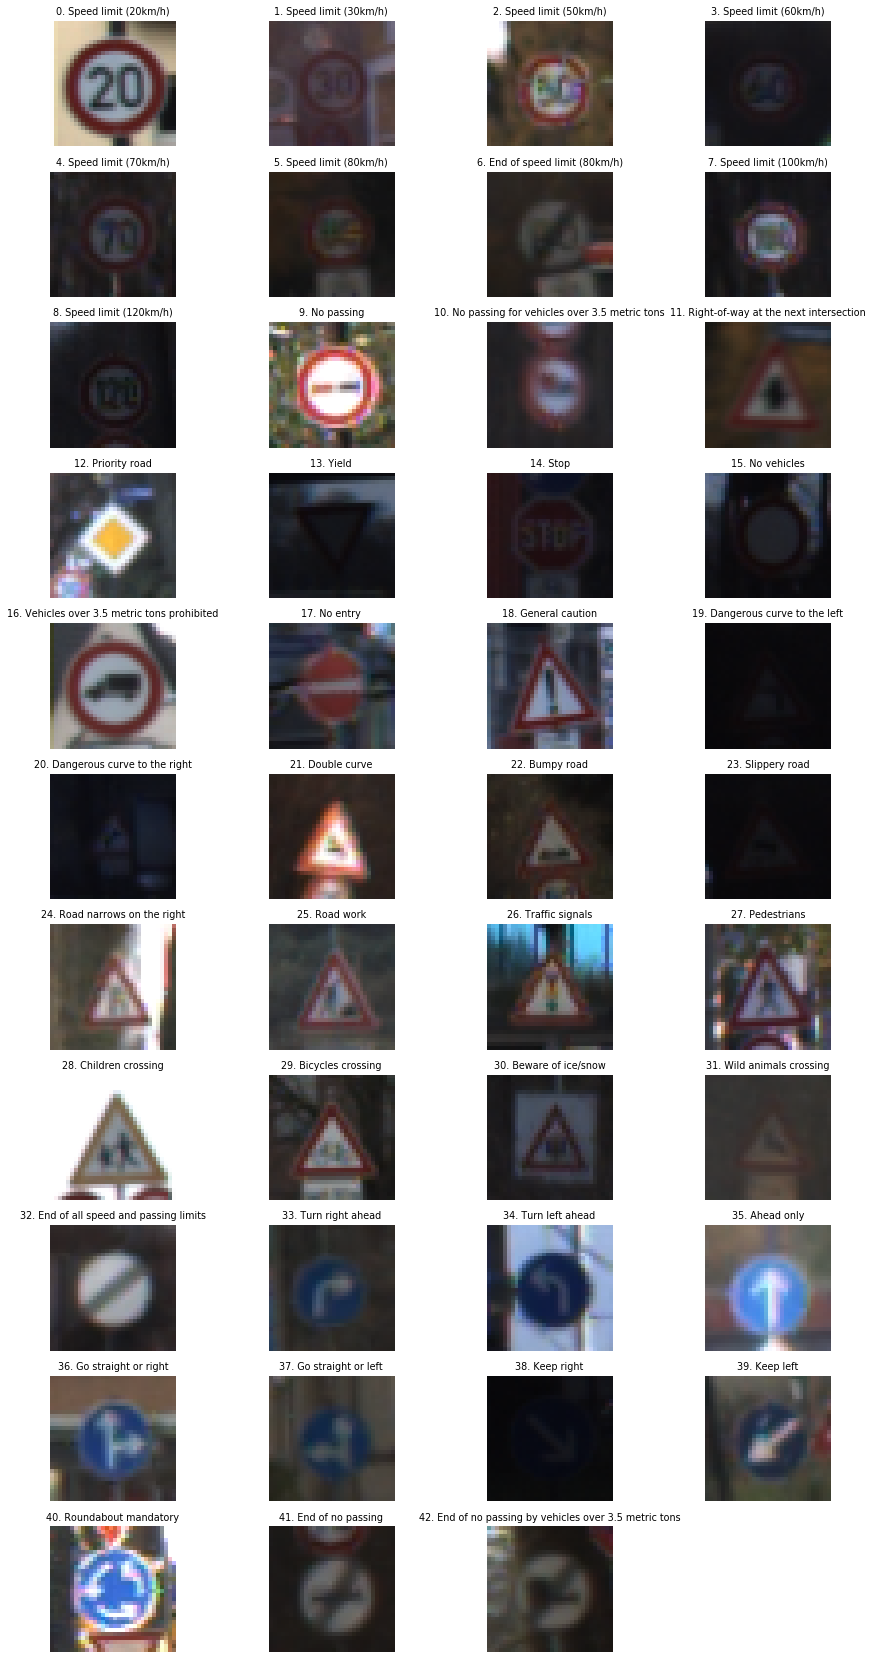

In [256]:
plt.figure(figsize=(15,30))
row = 11
col = 4   
for label in range(43):
    for i, x in enumerate(X_train):
        if y_train[i] == label:
            break
    
    assert y_train[i] == label, 'Cannot find label {}'.format(i)
    plt.subplot(row, col, label + 1)
    plt.imshow(x)
    plt.axis('off')
    plt.title("{}. {}".format(label, names.iloc[label]['SignName']))

#### Display the class distribution of three sets

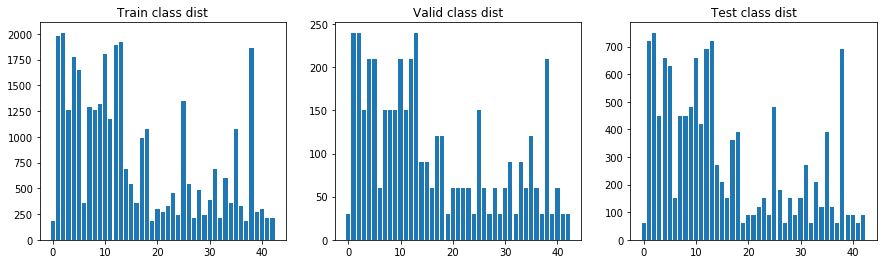

In [7]:
from collections import Counter

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
train_distribution = Counter(y_train)
plt.bar(list(train_distribution.keys()), list(train_distribution.values()))
plt.title('Train class dist')

plt.subplot(1,3,2)
valid_distribution = Counter(y_valid)
plt.bar(list(valid_distribution.keys()), list(valid_distribution.values()))
plt.title('Valid class dist')

plt.subplot(1,3,3)
test_distribution = Counter(y_test)
plt.bar(list(test_distribution.keys()), list(test_distribution.values()))
plt.title('Test class dist')
plt.savefig("./visualization/class_distribution.jpg")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. 
def normalize(x):
    return (x - 0.5) / 0.5

# convert the RGB image into grayscale, using three different scales for three colors
def grayscale(x):
    gray = np.average(gray, weights=[0.299, 0.587, 0.114], axis = -1)
    return 

# This already convert the colorscale from [0, 255] into [0, 1]
def clahe(x, clip_limit):
    return exposure.equalize_adapthist(clip_limit=clip_limit, image=x)
    
def preprocess(data):
    temp = np.zeros_like(a=data, dtype=np.float32)
    
    for i in tqdm(range(len(data))):
        temp[i] = clahe(data[i], clip_limit=0.1)
    
    return temp
        
X_train_normal = preprocess(X_train)
X_valid_normal = preprocess(X_valid)
X_test_normal  = preprocess(X_test)

In [10]:
should_dump = False
if should_dump:
    with open("./data/normalized/train_normal.p", "wb") as processed_train_file:
        pickle.dump(X_train_normal, processed_train_file)
        processed_train_file.close()

    with open("./data/normalized/valid_normal.p", "wb") as processed_valid_file:
        pickle.dump(X_valid_normal, processed_valid_file)
        processed_valid_file.close()

    with open("./data/normalized/test_normal.p", "wb") as processed_test_file:
        pickle.dump(X_test_normal, processed_test_file)
        processed_test_file.close()

In [11]:
with open("./data/normalized/train_normal.p", "rb") as file:
    X_train_normal = pickle.load(file)
    file.close()

with open("./data/normalized/valid_normal.p", "rb") as file:
    X_valid_normal = pickle.load(file)
    file.close()
    
with open("./data/normalized/test_normal.p", "rb") as file:
    X_test_normal = pickle.load(file)
    file.close()

#### Compare image before and after preprocessing

No passing for vehicles over 3.5 metric tons


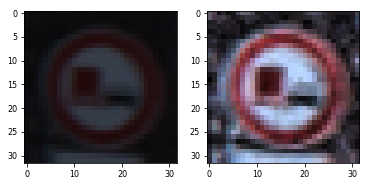

In [131]:
@widgets.interact(image_index=(0, len(X_train_normal), 1), clip_limit = (0,2,0.01))
def find_clip(image_index, clip_limit):
    print(names.iloc[y_train[image_index]]['SignName'])
    img = X_train[image_index]
    processed_img = X_train_normal[image_index]
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(img)

    plt.subplot(1,2,2)
    plt.imshow(processed_img, cmap='gray')

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle


class_max_size = 6000
X_train_aug = np.empty((0,32,32,3))
y_train_aug = np.empty(0, dtype=np.uint8)

# Image data generator object to produce augmented data
datagen = ImageDataGenerator(zca_whitening=True, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.15, zoom_range=0.15,
                             channel_shift_range=0.1, fill_mode='nearest',
                             horizontal_flip=False, vertical_flip=False)


for i in tqdm(range(n_classes)):
    class_images = X_train_normal[y_train==i]
    class_labels = y_train[y_train==i]
    
    cur_X_aug = np.copy(class_images)
    cur_y_aug = np.copy(class_labels)
    
#     while len(cur_X_aug) < class_max_size:
#         X, y = datagen.flow(class_images, class_labels, batch_size=len(class_images), seed = 283)
#         cur_X_aug = np.append(class_images, X, axis=0)
#         cur_y_aug = np.append(class_labels, y, axis=0)

    for X, y in datagen.flow(class_images, class_labels, batch_size=len(class_images), seed = 283):
        cur_X_aug = np.append(cur_X_aug, X, axis=0)
        cur_y_aug = np.append(cur_y_aug, y, axis=0)
        #print("{0} {1}\n".format(i, len(cur_X_aug) ))
        if len(cur_X_aug) > class_max_size:
            break
        
    X_train_aug = np.append(X_train_aug, cur_X_aug[:class_max_size], axis=0)
    y_train_aug = np.append(y_train_aug, cur_y_aug[:class_max_size], axis=0)
    
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=283)

X_train_aug = np.average(X_train_aug, weights=[0.299, 0.587, 0.114], axis = -1)
X_valid_normal = np.average(X_valid_normal, weights=[0.299, 0.587, 0.114], axis = -1)
X_test_normal = np.average(X_test_normal, weights=[0.299, 0.587, 0.114], axis = -1)

X_train_aug = np.expand_dims(X_train_aug, axis=-1)
X_valid_normal = np.expand_dims(X_valid_normal, axis=-1)
X_test_normal = np.expand_dims(X_test_normal, axis=-1)

### Save & Load augmented data

To save time, I decided to store all augmented data into external file and load it back whenever I ran the notebook again.

In [26]:
required_save = False

if required_save:
    # This piece of code is not neccesarily executed, as augmented data already being loaded from disk.
    with open("./data/normalized/train_aug.p", "wb") as processed_train_file:
        pickle.dump(X_train_aug, processed_train_file)
        processed_train_file.close()

    with open("./data/normalized/y_train_aug.p", "wb") as y_train_file:
        pickle.dump(y_train_aug, y_train_file)
        y_train_file.close()

    with open("./data/normalized/valid_aug.p", "wb") as processed_valid_file:
        pickle.dump(X_valid_normal, processed_valid_file)
        processed_valid_file.close()

    with open("./data/normalized/test_aug.p", "wb") as processed_test_file:
        pickle.dump(X_test_normal, processed_test_file)
        processed_test_file.close()

In [16]:
# Restore augmented data into memory

with open("./data/normalized/train_aug.p", "rb") as file:
    X_train_aug = pickle.load(file)
    file.close()

with open("./data/normalized/y_train_aug.p", "rb") as file:
    y_train_aug = pickle.load(file)
    file.close()
    
with open("./data/normalized/valid_aug.p", "rb") as file:
    X_valid_normal = pickle.load(file)
    file.close()
    
with open("./data/normalized/test_aug.p", "rb") as file:
    X_test_normal = pickle.load(file)
    file.close()

### Augmented image distribution|

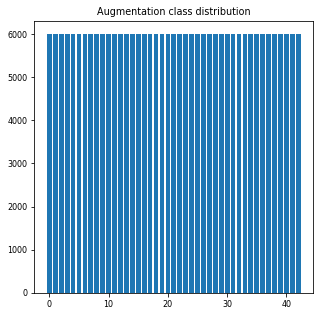

In [133]:
# Visualize the distribution of images among classes after augmentation
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
aug_train_dist = Counter(y_train_aug)
plt.bar(list(aug_train_dist.keys()), list(aug_train_dist.values()))
plt.title('Augmentation class distribution')

### Model Architecture

In [20]:
from tensorflow.contrib.layers import flatten

def LeNet_v4(x, keep_rate = 0.5):
   
    # mean
    mu = 0
    
    # stddev
    sigma = 0.1
    
    weights = {
        1: tf.Variable(tf.truncated_normal(shape = (3,3,1,20),  mean = mu, stddev=sigma, name='w1')),
        2: tf.Variable(tf.truncated_normal(shape = (3,3,20,40), mean = mu, stddev=sigma, name='w2')),
        3: tf.Variable(tf.truncated_normal(shape = (3,3,40, 100), mean = mu, stddev=sigma, name='w3')),
        4: tf.Variable(tf.truncated_normal(shape = (3,3,100,400), mean = mu, stddev = sigma, name='w4')),
        #4: tf.Variable(tf.truncated_normal(shape = (400, 800), mean = mu, stddev=sigma)),
        5: tf.Variable(tf.truncated_normal(shape = (6100, 43), mean = mu, stddev=sigma, name='w5'))
    }
                       
    biases = {
        1: tf.Variable(tf.zeros(20), name='b1'),
        2: tf.Variable(tf.zeros(40), name='b2'),
        3: tf.Variable(tf.zeros(100), name='b3'),
        4: tf.Variable(tf.zeros(400), name='b4'),
        #4: tf.Variable(tf.zeros(800)),
        5: tf.Variable(tf.zeros(n_classes), name='b5')
    }
    layers = []
    #Input: (32, 32, 1). 
    layer1 = tf.nn.conv2d(x, weights[1], strides=[1,1,1,1], padding='VALID', name='l1')
    layer1 = tf.add(layer1, biases[1], name="l1-a") # (30, 30, 20)
    
    
    layer1 = tf.nn.relu(layer1, name='l1-relu')
    layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID', name='l1-max') # (15, 15, 6)
    # after maxpool: (15, 15, 20)
    layers.append(layer1)
    
    layer2 = tf.nn.conv2d(layer1, weights[2], strides=[1,1,1,1], padding='VALID', name='l2') # (13, 13, 16)
    layer2 = tf.add(layer2, biases[2], name='l2-a')
    
    layer2 = tf.nn.relu(layer2, name='l2-relu')
    layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME', name='l2-max') # (7, 7, 32)
    # Layer 2 after conv: 7x7x40
    layers.append(layer2)
    
    layer3 = tf.nn.conv2d(layer2, weights[3], strides=[1,1,1,1], padding='VALID', name='l3') # (5, 5, 100)
    layer3 = tf.add(layer3, biases[3], name='l3-a')
    
    layer3 = tf.nn.relu(layer3, name='l3-relu')
    
    layers.append(layer3)
                       
    # branch out into two seperate layers
    layer4a = tf.nn.conv2d(layer3, weights[4], strides=[1,1,1,1], padding='VALID', name='l4a') # (3,3,400)
    layer4a = tf.add(layer4a, biases[4], name='l4a-a')
    layer4a = tf.nn.relu(layer4a, name='l4a-relu')
    layer4a = flatten(layer4a) 

    # branched-out layer
    layer4b = flatten(layer3) #2500
    
    
    # merge them together
    layer4 = tf.concat([layer4a, layer4b], 1, name='l4')
    layer4 = tf.nn.dropout(layer4, keep_prob=keep_rate, name='l4-drop')
    print(layer4a.shape, layer4b.shape, layer4.shape)
    
    #layer4 = tf.nn.relu(layer4)
    
    layers.append(layer4)
    
    layer5 = tf.add(tf.matmul(layer4, weights[5], name='l5-matmul'), biases[5], 'l5-a')
    layers.append(layer5)
    
    for layer in layers:
        print("{}".format(layer.shape))
    
    logits = layer5
    
    return logits

### Features and Models


In [21]:
x = tf.placeholder(tf.float32, (None, 32,32,1), name='x') # because of normalization
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, n_classes, name='one_hot_y')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
logits = LeNet_v4(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name='cross-entropy')
loss_operation = tf.reduce_mean(cross_entropy, name='loss_op')

optimizer = tf.train.AdamOptimizer(learning_rate=rate, name='train')
training_operation = optimizer.minimize(loss_operation, name='optimize')

(?, 3600) (?, 2500) (?, 6100)
(?, 15, 15, 20)
(?, 7, 7, 40)
(?, 5, 5, 100)
(?, 6100)
(?, 43)


In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1, name='max-logits'), tf.argmax(one_hot_y, 1, name='max_one_hot_y'))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32, name='cast'), name='mean')
saver = tf.train.Saver(name='saver')

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

### Train the Model

In [33]:
# Hyperparameters
EPOCHS = 20
BATCH_SIZE = 100
model_version = "v4"

In [198]:
with tf.Session() as sess:
    #Auxillaries
    accu_list = []
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet{}.ckpt'.format(model_version))
    num_examples = len(X_train)
    
    print('Training ...\n')
    
    for i in range(EPOCHS):
        start = time.time()
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid_normal, y_valid)
        accu_list.append(validation_accuracy)
        
        print("epoch {}: acc: {:.4f}. Time: {:.1f} s".format(i+1, validation_accuracy, time.time() - start))
    
    saver.save(sess, './lenet{}.ckpt'.format(model_version))
    print("Model saved")


INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt
Training ...

epoch 1: acc: 0.9771. Time: 25.0 s
epoch 2: acc: 0.9739. Time: 25.5 s
epoch 3: acc: 0.9785. Time: 25.9 s
epoch 4: acc: 0.9757. Time: 25.3 s
epoch 5: acc: 0.9757. Time: 24.4 s
epoch 6: acc: 0.9712. Time: 24.3 s
epoch 7: acc: 0.9766. Time: 24.8 s
epoch 8: acc: 0.9762. Time: 25.7 s
epoch 9: acc: 0.9782. Time: 25.9 s
epoch 10: acc: 0.9773. Time: 25.8 s
epoch 11: acc: 0.9828. Time: 26.8 s
epoch 12: acc: 0.9825. Time: 26.0 s
epoch 13: acc: 0.9748. Time: 26.2 s
epoch 14: acc: 0.9782. Time: 26.9 s
epoch 15: acc: 0.9771. Time: 27.6 s
epoch 16: acc: 0.9757. Time: 26.1 s
epoch 17: acc: 0.9816. Time: 26.6 s
epoch 18: acc: 0.9739. Time: 25.9 s
epoch 19: acc: 0.9741. Time: 25.7 s
epoch 20: acc: 0.9803. Time: 26.4 s
Model saved


#### Calculate the training accuracy

In [199]:
# calculate training accuracy
with tf.Session() as sess:
    saver.restore(sess, './lenet{}.ckpt'.format(model_version))
    training_accuracy = evaluate(X_train_aug, y_train_aug)
    print(training_accuracy)

# Saved training data into text file
with open("./result/accuracy.txt", mode="a") as output_file:
    line = ", ".join(["{:.4f}".format(num) for num in accu_list])
    print("{} {}".format(model_version, line), file=output_file)

INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt
0.996976747046


#### Calculate the test accuracy

In [202]:
# calculate test accuracy
with tf.Session() as sess:
    saver.restore(sess, './lenet{}.ckpt'.format(model_version))
    test_accuracy = evaluate(X_test_normal, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt
Test Accuracy = 0.9680


---
## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

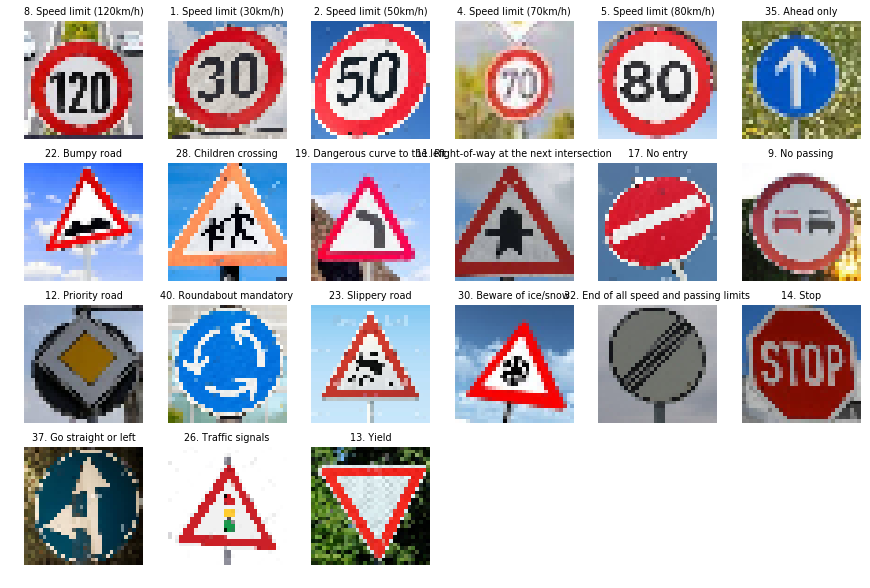

In [253]:
### Load the images and plot them here.

plt.rcParams.update({'font.size': 8})
paths = glob.glob("./data/images/test/sign_*")
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in paths]
test_classes = [8, 1, 2, 4, 5, 35, 22, 28, 19, 11,17, 9, 12,40,23,30,32,14,37, 26,13]


plt.figure(figsize=(15,10))

# Plot each image into the grid
for i, (img, label) in enumerate(zip(images, test_classes)):
    img = cv2.resize(img, (32,32))
    sign_name = "{}. {}".format(label, names.iloc[label]['SignName'])
    
    plt.subplot(4,6, i + 1)
    plt.axis('off')
    plt.title(sign_name)
    plt.imshow(img)

plt.savefig("./visualization/sign_grid.jpg")

# for visualisation only
image_dict = {label: img for label, img in zip(test_classes, images)}

#### Preprocessed pipeline

In [238]:
def preprocess_final(img):
    result = cv2.resize(img, (32,32))
    
    # apply clahe 
    result = exposure.equalize_adapthist(clip_limit=0.1, image=result)
    
    #convert to grayscale
    result = np.average(result, weights=[0.299, 0.587, 0.114], axis = -1)
    result = np.expand_dims(result, axis = -1)
    
    return result
# 
processed_images = np.array([preprocess_final(img) for img in images], dtype=np.float32)

### Predict the Sign Type for Each Image

In [239]:
k = 5
softmax_values = tf.nn.softmax(logits=logits)
top_values = tf.nn.top_k(softmax_values, k=k)

In [240]:
def accuracy_sup(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

In [254]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, './lenetv4.ckpt')
    results = sess.run(top_values, feed_dict={x: processed_images, y: test_classes})
    top_softmax = results.values
    top_labels = results.indices
### Feel free to use as many code cells as needed.

INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt


#### Visualize the data with original images, preprocessed images, and top k softmax probabilities

no illustration for: Speed limit (20km/h)
no illustration for: Speed limit (100km/h)
no illustration for: End of speed limit (80km/h)
no illustration for: Wild animals crossing
no illustration for: Pedestrians
no illustration for: Road narrows on the right
no illustration for: Speed limit (20km/h)
no illustration for: End of speed limit (80km/h)
no illustration for: Speed limit (60km/h)
no illustration for: Vehicles over 3.5 metric tons prohibited
no illustration for: Go straight or right
no illustration for: Bicycles crossing
no illustration for: End of no passing
no illustration for: Road narrows on the right
no illustration for: General caution
no illustration for: Speed limit (60km/h)
no illustration for: Wild animals crossing
no illustration for: Pedestrians
no illustration for: Keep left
no illustration for: Turn right ahead
no illustration for: End of no passing
no illustration for: No passing for vehicles over 3.5 metric tons
no illustration for: No vehicles
no illustration for

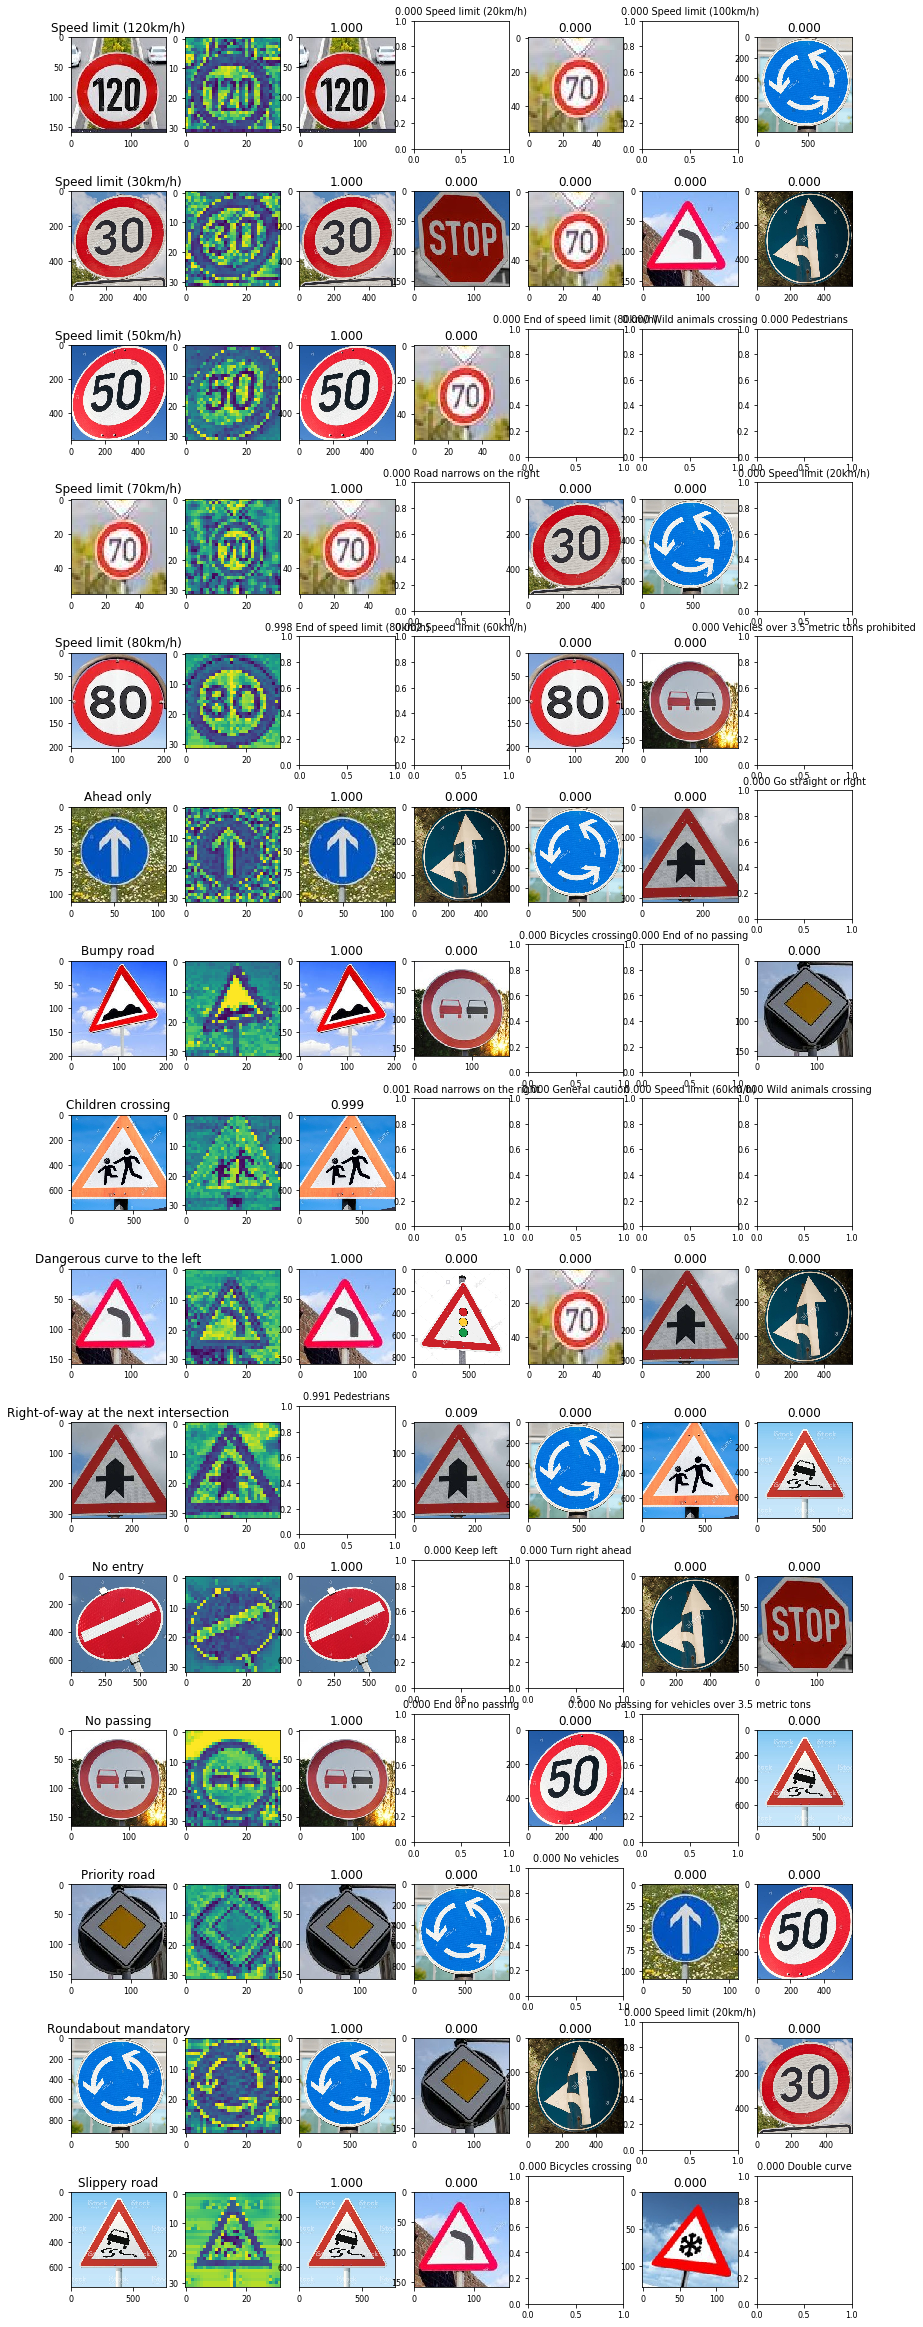

In [279]:
ncols = 2 + k
nrows = 15

plt.figure(figsize=(14,42))

for index, label in enumerate(test_classes):
    if index >= nrows:
        break
        
    plt.subplot(nrows, ncols, ncols*index + 1)
    plt.imshow(image_dict[label])
    plt.title(names.iloc[label]['SignName'], fontsize=12)
    
    plt.subplot(nrows, ncols, ncols*index + 2)
    plt.imshow(np.mean(preprocess_final(image_dict[label]), axis=-1))
    
    for rank in range(k):
        plt.subplot(nrows, ncols, ncols*index + 3 + rank)
        # not correct
        image_index = top_labels[index][rank]
        softmax_value = top_softmax[index][rank]
        try:
            plt.imshow(image_dict[image_index])
            plt.title("{:.3f}".format(softmax_value), fontsize=12)
        except Exception as e:
            print('no illustration for: {}'.format(names.iloc[image_index]['SignName']))
            plt.title("{:.3f} {}".format(softmax_value, names.iloc[image_index]['SignName']))          


### Analyze Performance

In [249]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    saver.restore(sess, './lenet{}.ckpt'.format(model_version))
    accuracy = sess.run(accuracy_operation, feed_dict={x: processed_images, y: test_classes})
    print("Accuracy over {} images: {:.4f}.".format(len(test_classes), accuracy))

### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt
Accuracy over 21 images: 0.9048.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability.

In [245]:
with tf.Session() as sess:
    saver.restore(sess, './lenet{}.ckpt'.format(model_version))
    accuracy_count = 0
    for i, (img, label) in enumerate(zip(images, test_classes)):
        input_img = preprocess_final(img) 
        input_imgs = np.array([input_img], dtype=np.float32)
        accuracy = sess.run(accuracy_operation, feed_dict={x: input_imgs, y: [label]})
        top_matches = sess.run(top_values, feed_dict={x: input_imgs, y: [label]})
        
        if top_matches.indices[0][0] == label:
            accuracy_count += 1 
        print("{} {} {}: {} {}".format(i+1, names.iloc[label]["SignName"], label, top_matches.indices, top_matches.values))
        
print("Correctly predicted: {}/{}".format(accuracy_count, len(test_classes)))

INFO:tensorflow:Restoring parameters from ./lenetv4.ckpt
1 Speed limit (120km/h) 8: [[ 8  0  4  7 37]] [[  9.89594936e-01   7.40018953e-03   3.00493278e-03   6.59039473e-14
    4.28235209e-15]]
2 Speed limit (30km/h) 1: [[ 1 14  4 37 34]] [[  1.00000000e+00   8.98453699e-19   2.20448354e-22   2.66580649e-23
    2.80464211e-24]]
3 Speed limit (50km/h) 2: [[2 4 5 1 6]] [[  9.99740660e-01   8.03828298e-05   7.80293485e-05   6.91012974e-05
    3.12250304e-05]]
4 Speed limit (70km/h) 4: [[ 4 40  0  1 24]] [[  1.00000000e+00   2.69992171e-27   8.22628596e-29   1.74753978e-29
    1.18202062e-29]]
5 Speed limit (80km/h) 5: [[6 9 5 3 1]] [[  9.99645591e-01   2.95275328e-04   3.41921441e-05   2.49457280e-05
    4.37471348e-09]]
6 Ahead only 35: [[35 37 25 27 40]] [[  1.00000000e+00   7.07971355e-15   2.50473293e-23   3.12299555e-25
    3.76742173e-27]]
7 Bumpy road 22: [[22  9 29 12 20]] [[  1.00000000e+00   8.62553098e-14   1.48853525e-23   2.20167430e-24
    5.25005193e-29]]
8 Children crossin

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [94]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")